In [1]:
library(tidyverse)
library(tidytext)
library(topicmodels)
library(tm)

# meter cleaning function
source("src/meter_cleaning.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




## 1. Load raw DTM

In [2]:
# load dtm
# if you want to replicate this part of the script, don't forget to UZNIP TD_matrix first

#unzip(zipfile="/data/TD_matrix_tf.5000.tsv.zip", exdir="data/")

wide_dtm = read_tsv("data/TD_matrix_tf_5000_years.tsv")


Parsed with column specification:
cols(
  .default = col_double(),
  index = col_character()
)

See spec(...) for full column specifications.



## 2. Clean meter labels

In [3]:
#get doc names and run a meter cleaning function

docs_clean = clean_meter_from_docnames(wide_dtm[,1])

nrow(docs_clean)

[1] 82415

## 3. Year cleaning

In [5]:
names_clean = docs_clean  %>% separate(doc, c("id", "auth", "year", "meter", "clausula"),sep="_")  %>%
mutate(idnum = row_number(), #preserve original of a label in dtm
       nchar = nchar(year))  %>% 
separate(year, c("start", "end"), sep="-")  %>% mutate(start = as.numeric(start), end=as.numeric(end))  %>%
mutate(diff = end-start)  %>% 
mutate(year = case_when(is.na(diff) ~ start,
                             diff < 30 ~ end))  %>% #to all uncertain dates assign the upper threshold if difference between lower and upper is less  than 30 years, otherwise NA
filter(year < 1950)  %>% #filter first half
select(idnum, id, auth, year, meter, clausula)  %>% 
unite(doc, id:clausula)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 65899 rows [1, 6, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 22, 24, 25, 26, 27, 28, 35, 36, ...].”


## 3. Prepare matrix

In [6]:
#subset matrix by year
dtm_fin = wide_dtm %>% select(-index) %>% as.matrix()
rm(wide_dtm)
dtm_fin = dtm_fin[names_clean$idnum,]




In [7]:
#set names with cleaned meter
rownames(dtm_fin) = names_clean  %>% pull(doc)

#dtm_fin = as.DocumentTermMatrix(dtm_fin, weighting = tm::weightTf)


In [8]:
dtm_fin[1:10,]

,август,аврора,автомобиль,ад,адам,адский,азия,ай,акация,аккорд,⋯,ярко,ярмо,яростный,ярость,ярый,ясно,ясность,ясный,ястреб,ящик
fonviz-281_Д.И.Фонвизин_1787_Я6_жжмм,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
vmaik-017_В.И.Майков_1767_Явольн_вольн,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
vmaik-026_В.И.Майков_1767_Явольн_вольн,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
vmaik-095_В.И.Майков_1767_Я6_жжмм,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
vmaik-113_В.И.Майков_1776_Я6_ммжж,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
vmaik-035_В.И.Майков_1767_Явольн_вольн,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
vmaik-094_В.И.Майков_1762_Я6_жжмм,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
vmaik-063_В.И.Майков_1778_Я4_жм,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
vmaik-071_В.И.Майков_1770_Я6_жжмм,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
vmaik-067_В.И.Майков_1773_Х4_мж,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## 4. Trim out small texts

In [10]:
x = rowSums(dtm_fin)

m
<dbl>
47


lower,upper
<dbl>,<dbl>
20,102


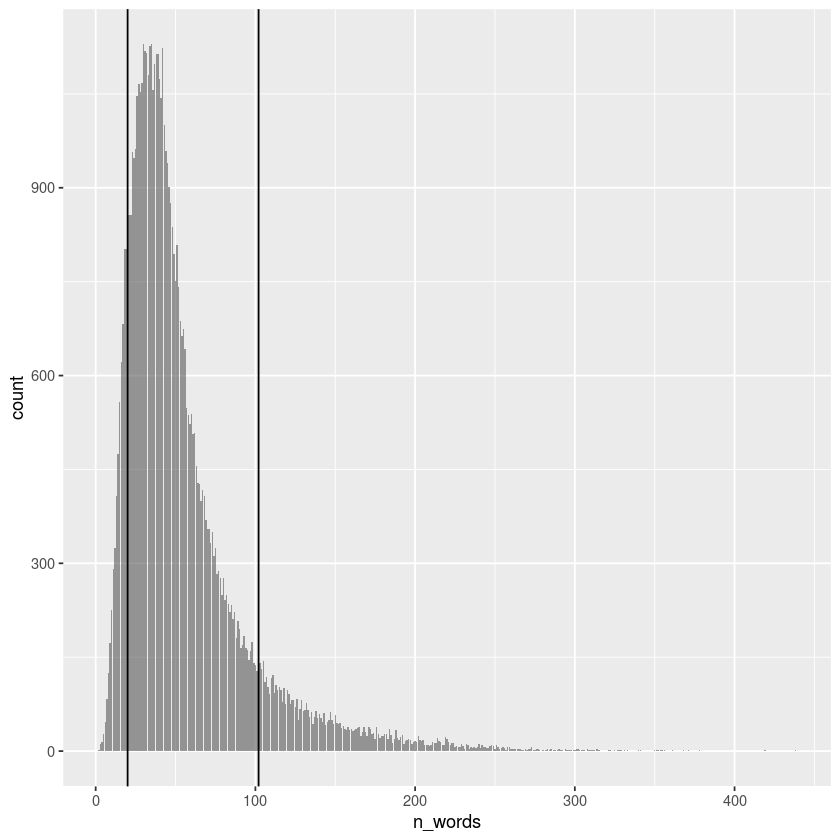

In [11]:
# visualize size distribution & quantiles
poem_size = tibble(doc = names(x), n_words = x)

quantiles = poem_size %>%
  summarize(lower = quantile(n_words, probs = .10),
            upper = quantile(n_words, probs = .90))

poem_size  %>% ggplot(aes(n_words)) + geom_bar(alpha=0.6) +
  geom_vline(data = quantiles, aes(xintercept = lower)) +
  geom_vline(data = quantiles, aes(xintercept = upper))

poem_size  %>% filter(n_words > 27 & n_words < 99)  %>% summarise(m = median(n_words))

quantiles

In [ ]:
poem_size  %>% 
    separate(doc, c("id", "author", "firstline", "meter", "claus"),sep="_")  %>% 
    group_by(meter)  %>% 
    mutate(meter_size = max(row_number(meter)))  %>% 
    filter(meter != "NA",
           meter_size > 200)  %>% 
ggplot(aes(n_words)) + geom_bar() + facet_wrap(~meter)

In [13]:
# trim dtm to .10 - .80 range

length(x)

dtm_fin = dtm_fin[(x > quantiles$lower) & (x < quantiles$upper),]

nrow(dtm_fin)

[1] 60379

[1] 47804

## 5. Save final DTM

In [14]:
save(dtm_fin, file="data/dtm_fin.Rda")